In [3]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


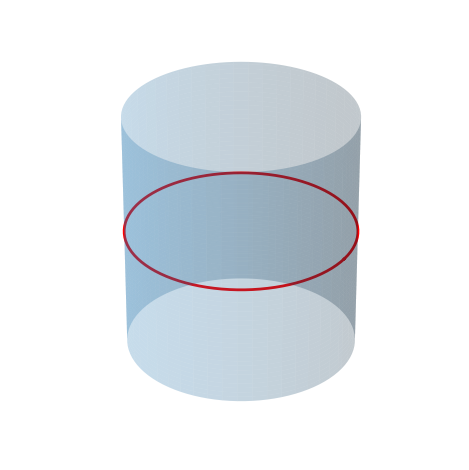

In [27]:
# plot 3D cylinder 
def plot_cylinder(radius, height, num_points=100):
    # Create a cylinder
    z = np.linspace(0, height, num_points)
    theta = np.linspace(0, 2 * np.pi, num_points)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)

    # rotate view by 90 degrees

    # Plot the cylinder
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.25)
    ax.set_box_aspect([1, 1, 1])  # aspect ratio is 1:1:1

    ax.set_axis_off()

    # plot circle on the edge of the cylinder
    circle_x = radius * np.cos(theta)
    circle_y = radius * np.sin(theta)
    circle_z = 1
    ax.plot(circle_x, circle_y, circle_z, color='red', linewidth=2)

    plt.tight_layout()  

    plt.show()
# Example usage
if __name__ == "__main__":
    plot_cylinder(radius=1, height=2)


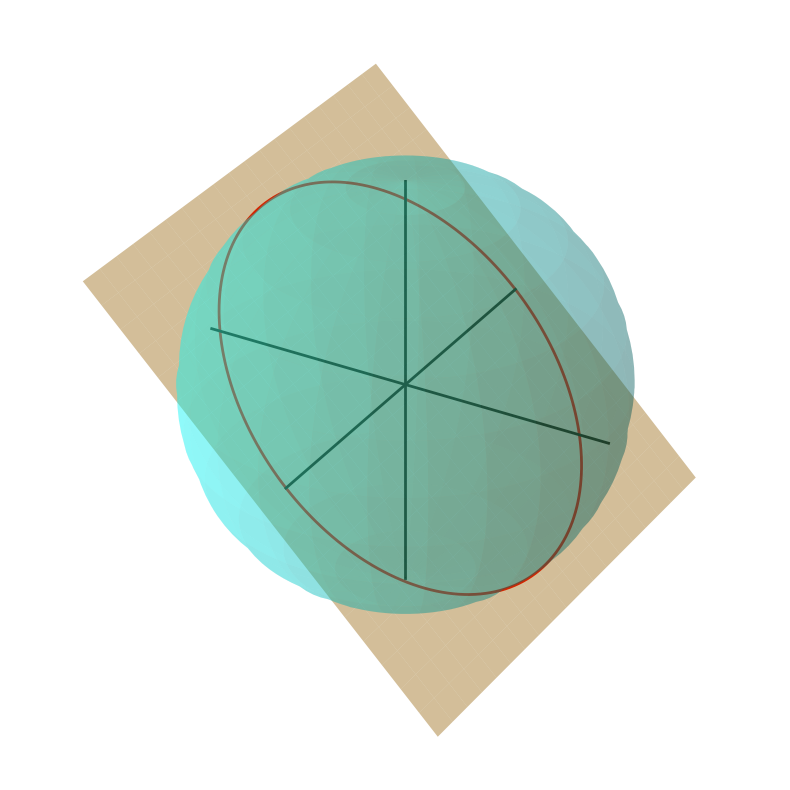

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create 3D axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Parameters
R = 1.0  # sphere radius
# Define plane by its normal vector (tilted 45° around the y-axis)
n = np.array([1, 0, 1])
n = n / np.linalg.norm(n)

# 1) Plot the sphere as a solid surface
phi = np.linspace(0, np.pi, 50)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x_s = R * np.sin(phi) * np.cos(theta)
y_s = R * np.sin(phi) * np.sin(theta)
z_s = R * np.cos(phi)
ax.plot_surface(
    x_s, y_s, z_s,
    rstride=4, cstride=4,
    color='cyan', alpha=0.25, edgecolor='none'
)

# 2) Plot the infinite plane (as a square patch)
# Find two orthonormal vectors spanning the plane
# pick an arbitrary vector not parallel to n
arbitrary = np.array([0, 0, 1]) if abs(n[2]) < 0.9 else np.array([1, 0, 0])
u = np.cross(n, arbitrary)
u /= np.linalg.norm(u)
v = np.cross(n, u)

# create a grid in (s,t) on the plane
grid_lim = R * 1.2
s = np.linspace(-grid_lim, grid_lim, 20)
t = np.linspace(-grid_lim, grid_lim, 20)
s, t = np.meshgrid(s, t)
# parametric plane points: P = s*u + t*v
x_p = s * u[0] + t * v[0]
y_p = s * u[1] + t * v[1]
z_p = s * u[2] + t * v[2]
ax.plot_surface(
    x_p, y_p, z_p,
    color='orange', alpha=0.4, edgecolor='none'
)

# 3) Compute and plot the intersection circle
# In the plane through the origin, the intersection is a great circle of radius R
t_circle = np.linspace(0, 2*np.pi, 200)
x_c = R * (u[0] * np.cos(t_circle) + v[0] * np.sin(t_circle))
y_c = R * (u[1] * np.cos(t_circle) + v[1] * np.sin(t_circle))
z_c = R * (u[2] * np.cos(t_circle) + v[2] * np.sin(t_circle))
ax.plot(x_c, y_c, z_c, color='red', linewidth=2)

# add x, y, z axes
ax.plot([-R, R], [0, 0], [0, 0], color='black', linewidth=2)
ax.plot([0, 0], [-R, R], [0, 0], color='black', linewidth=2)
ax.plot([0, 0], [0, 0], [-R, R], color='black', linewidth=2)

# Beautify and show
ax.set_box_aspect((1,1,1))
ax.set_xlim([-R, R])
ax.set_ylim([-R, R])
ax.set_zlim([-R, R])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_axis_off()
plt.tight_layout()
plt.show()


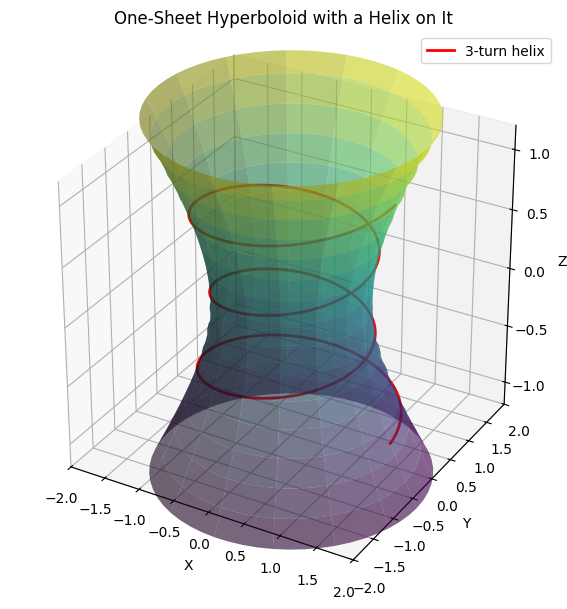

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # registers the 3D projection

# 1) Prepare the hyperboloid surface
#    We use the form x^2 + y^2 - z^2 = 1  (one-sheet hyperboloid)
u = np.linspace(-1.5, 1.5, 60)            # z-parameter
v = np.linspace(0, 2*np.pi, 60)          # angular parameter
u, v = np.meshgrid(u, v)

# Parametric equations:
#   x = sqrt(1 + z^2) * cos(v)
#   y = sqrt(1 + z^2) * sin(v)
#   z = u
x_s = np.sqrt(1 + u**2) * np.cos(v)
y_s = np.sqrt(1 + u**2) * np.sin(v)
z_s = u

# 2) Prepare the helix on the hyperboloid
#    We let z run from z_min to z_max, and wind N turns around
z_min, z_max = -1.0, 1.0
N_turns = 3
n_points = 300

t = np.linspace(0, 1, n_points)
z_h = z_min + (z_max - z_min) * t
phi_h = N_turns * 2*np.pi * t

# Helix coordinates satisfy the hyperboloid equation
x_h = np.sqrt(1 + z_h**2) * np.cos(phi_h)
y_h = np.sqrt(1 + z_h**2) * np.sin(phi_h)

# 3) Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# Hyperboloid as a solid semi-transparent surface
ax.plot_surface(
    x_s, y_s, z_s,
    rstride=4, cstride=4,
    facecolors=plt.cm.viridis((z_s - z_s.min())/(z_s.max()-z_s.min())),
    alpha=0.6, edgecolor='none'
)

# Helix in red
ax.plot(x_h, y_h, z_h, color='red', linewidth=2, label=f'{N_turns}-turn helix')

# Aesthetic adjustments
ax.set_box_aspect((1,1,1))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(z_min-0.2, z_max+0.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('One-Sheet Hyperboloid with a Helix on It')
ax.legend()

plt.tight_layout()
plt.show()


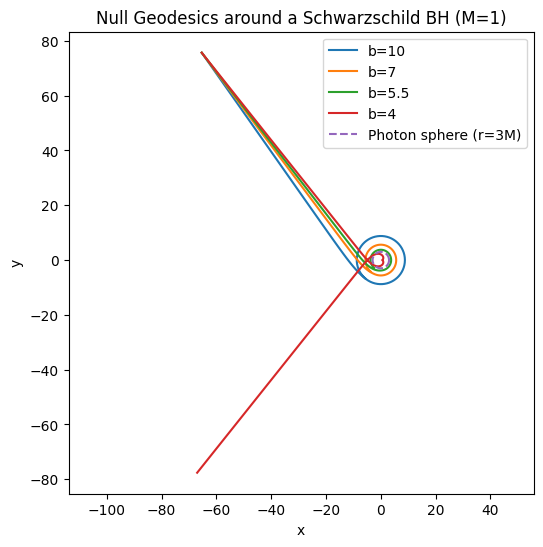

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def drdphi_in(phi, r, b, M=1):
    return -np.sqrt(np.maximum(r**4/b**2 - r**2 + 2*M*r, 0))

def drdphi_out(phi, r, b, M=1):
    return np.sqrt(np.maximum(r**4/b**2 - r**2 + 2*M*r, 0))

def compute_trajectory(b, phi_max=4, M=1, r_init=100):
    # Integrate inbound segment
    sol_in = solve_ivp(drdphi_in, [-phi_max, 0], [r_init], args=(b, M), max_step=0.1)
    phi_in = sol_in.t
    r_in = sol_in.y[0]
    # Integrate outbound segment from turning point
    sol_out = solve_ivp(drdphi_out, [0, phi_max], [r_in[-1]], args=(b, M), max_step=0.1)
    phi_out = sol_out.t
    r_out = sol_out.y[0]
    # Combine
    phi = np.concatenate([phi_in, phi_out])
    r = np.concatenate([r_in, r_out])
    # Convert to Cartesian
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return x, y

# Plot trajectories for different impact parameters
b_values = [10, 7, 5.5, 4]
plt.figure(figsize=(6,6))
for b in b_values:
    x, y = compute_trajectory(b)
    plt.plot(x, y, label=f'b={b}')

# Draw the photon sphere at r = 3M (with M=1)
theta = np.linspace(0, 2*np.pi, 300)
r_ps = 3
plt.plot(r_ps * np.cos(theta), r_ps * np.sin(theta), '--', label='Photon sphere (r=3M)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Null Geodesics around a Schwarzschild BH (M=1)')
plt.legend()
plt.axis('equal')
plt.show()
